# **Wine Quality Prediction Using Machine Learning**

This project will utilize and compare various machine learning approaches on predicting the quality of red variants of the Portuguese "Vinho Verde" wine based upon 11 physicochemical characteristics. More specifically, this project presents a binary classification task, where the models will predict whether a wine is 'good' or 'bad' based upon its features. The performance of the models will be compared to determine the most effective machine learning strategy. 

Table of Contents:
* [About the Data](#about_the_data)
* [Set Up / Cleaning](#set_up)
* [Exploratory Data Analysis](#eda)
    - [Histograms](#hist)
    - [Correlation Matrix](#correlation_matrix)
    - [Bar Plots](#bar_plot)
    - [Summary of Analysis](#summary_analysis)
* [Applying Machine Learning](#ml)
    - [Set Up](#processing)
    - [Logistic Regression](#logistic_regression)
    - [Random Forest](#random_forest)
    - [K-Nearest Neighbors](#knn)
    - [Support Vector Classifier](#svc)
* [Model Improvements](#model_improvements)
    - [Random Forest with GridSearchCV](#random_cross)
    - [KNN with Cross Validation](#knn_cross)
    - [SVC with GridSearchCV](#grid_search)
* [Conclusion](#conclusion)
* [Thank you!](#thanks)


<a id="about_the_data"></a>
# **About the Data**

This dataset provides physicochemical information on red variants of the Portuguese "Vinho Verde" wine. The dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality. 

Input variables (Features):
- Fixed acidity
- Volatile acidity
- Citric acid
- Residual sugar
- Chlorides
- Free sulfur dioxide
- Total sulfur dioxide
- Density
- pH
- Sulphates
- Alcohol

Output variable (Target):
- Quality

This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license. 

Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

<a id="set_up"></a>
# **Set Up / Cleaning**

This section sets up the project. First, all necessary packages will be loaded in. Next, the data will be read in via URL. Lastly, the dataset will be cleaned by dropping any potential null values. ***PLEASE NOTE: The data will be further processed AFTER the analysis step in order to prepare it as a binary classification task. More specifically, the target variable 'quality' will be encoded as 'good' or 'bad'. Moreover, the data will also be scaled with a Standard Scaler.***

In [1]:
# Loading necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.tree
import sklearn.linear_model
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
# Reading in the data
data = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [3]:
# Checking the data
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
# Dropping any potential null values
data.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# Checking for any remaining nulls
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']

for c in data.columns:
    string_null = np.array([x in a[2:] for x in data[c]])
    print(c, data[c].isnull().sum(), string_null.sum())

fixed acidity 0 0
volatile acidity 0 0
citric acid 0 0
residual sugar 0 0
chlorides 0 0
free sulfur dioxide 0 0
total sulfur dioxide 0 0
density 0 0
pH 0 0
sulphates 0 0
alcohol 0 0
quality 0 0


In [6]:
# Checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The dataset now appears to have no null values. I have ensured that all potential nulls, such as 'NaN', 'Null', 'NULL', 'None', 'NA', '?', '-', '.', and '' have been removed. Now that the dataset appears to be cleaned, we can move onto the exploratory data analysis. 

<a id="eda"></a>
# **Exploratory Data Analysis**

This section includes histograms, a correlation matrix as a heat map, and several bar plots. The histograms help us gain an understanding of the distribution of the data. The correlation matrix heat map identifies any potential significant relationships between single features and the target variable. The bar plots provide further visualization of any identified significant relationships. 

<a id="hist"></a>
## Histograms

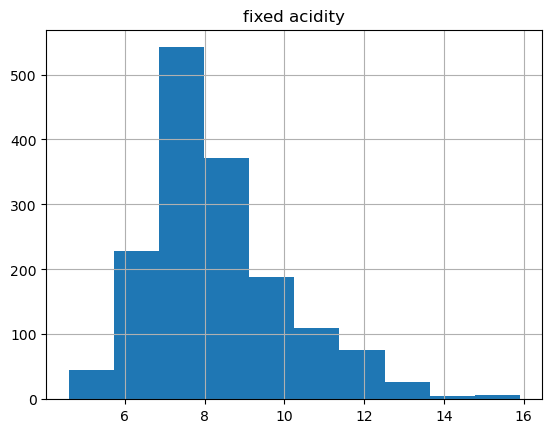

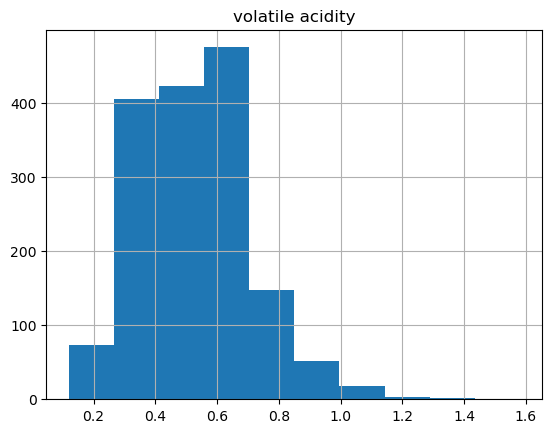

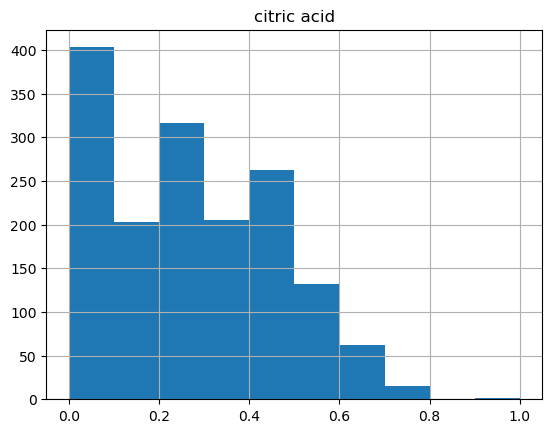

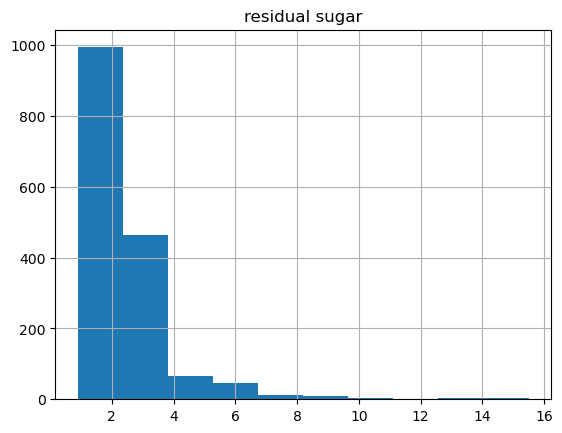

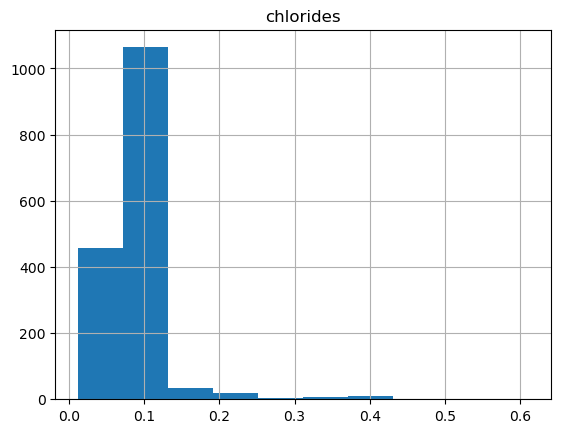

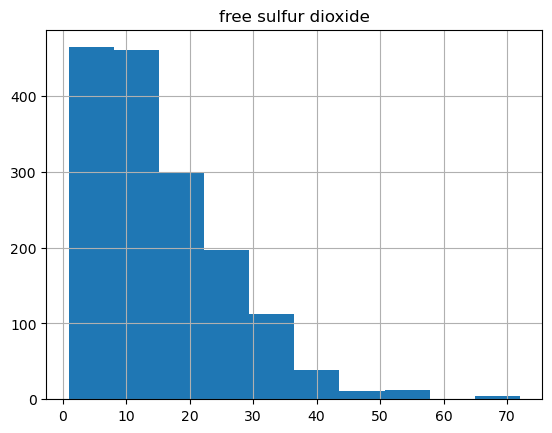

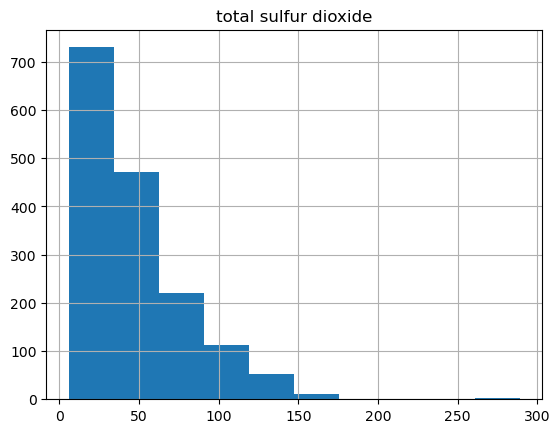

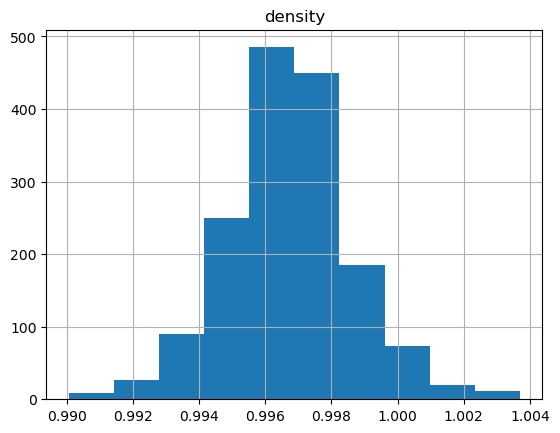

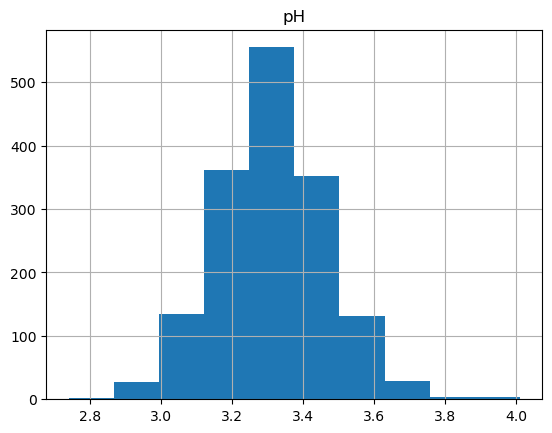

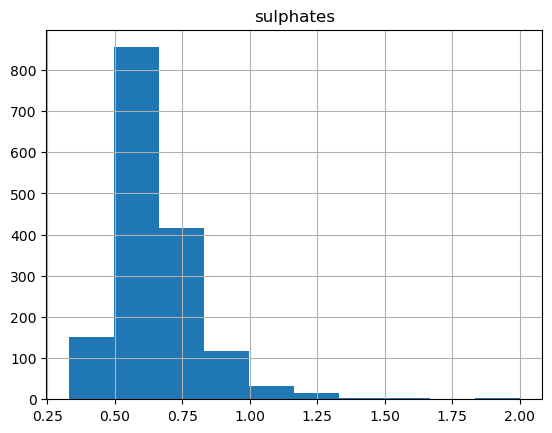

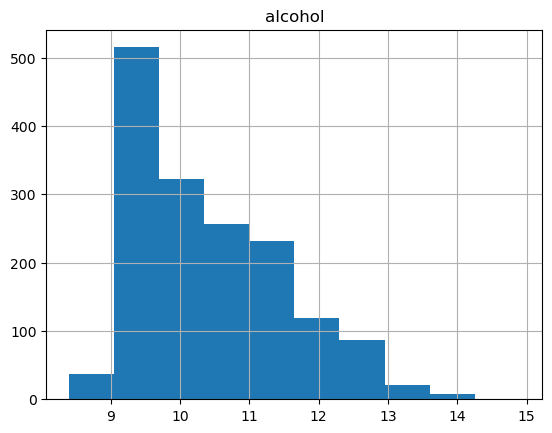

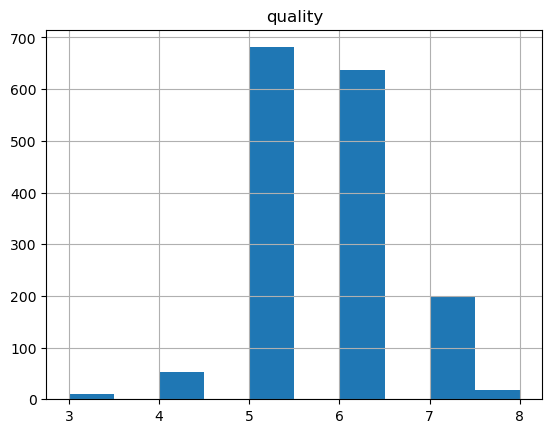

In [7]:
# Plotting histograms for each column
for c in data:
    data[c].hist()
    plt.title(c)
    plt.show()

The histograms above give us a brief insight into the distribution of our feature and target variables. At a quick glance, it is clear that the target variable 'quality' is unbalanced. By viewing the histogram immediately above, one could assume that there are much more wines with a quality of 5 or 6 (average wines) than there are wines with extremely low or high quality scores. Apart from this, many of the feature variables, such as 'alcohol', 'pH', and 'density', have a more balanced distribution of values. Due to the inbalance of 'quality', we will create a threshold that separates the wines into 'good' and 'bad' categories. Doing this will enable our binary classification task. 

<a id="correlation_matrix"></a>
## Correlation Matrix

<Axes: >

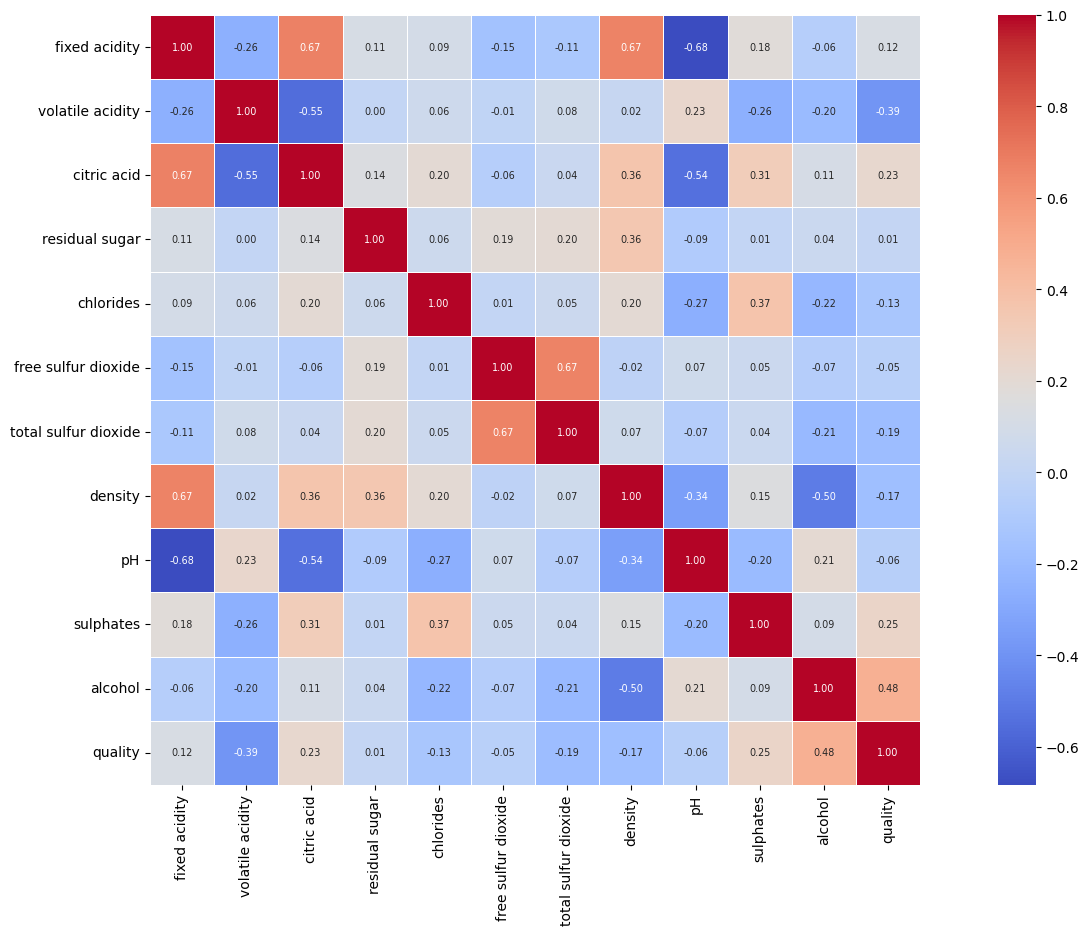

In [8]:
# Creating a correlation matrix (as a heatmap) on the dataset
matrix = data.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(matrix, cmap = 'coolwarm', square = True, 
            annot = True, fmt = ',.2f',
           annot_kws={'size':'x-small'}, linewidths = 0.5)

The heatmap of the correlation matrix shows that 'alcohol' may be the best predictor of 'quality' (as a single feature variable without any interaction). The correlation between 'alcohol' and 'quality' is 0.48. While this correlation is definitely low, it is relatively higher than the correlations of all other features to 'quality'. On the other hand, the strongest inverse correlation to 'quality' is 'volatile acidity' at -0.39. This negative relationship should make sense, as a higher level of volatile acetic acid can create a wine with an unpleasant vinegar taste. It should also be noted that there are relatively strong correlations between several features. Notably, 'fixed acidity' has a 0.67 correlation to both 'density' and 'citric acid'. Moreoever, 'total sulfur dioxide' has a 0.67 correlation to 'free sulfur dioxide'. This relationship seems obvious, as a higher amount of free and bound forms (total) of sulfur dioxide would result in a higher amount of free sulfur dioxide. 

<a id="bar_plot"></a>
## Bar Plots

<Axes: xlabel='quality', ylabel='alcohol'>

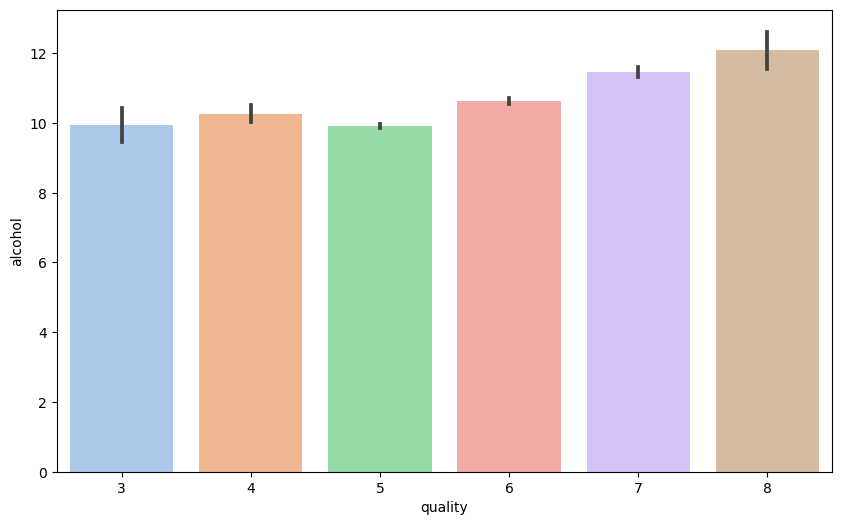

In [9]:
# Plotting the distribution of 'alcohol' vs 'quality'
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = data, palette = 'pastel')

The 0.48 correlation between 'alcohol' and 'quality' can be seen in the bar plot above. It appears that wines with the highest alcohol content tend to have the highest quality score. 

<Axes: xlabel='quality', ylabel='volatile acidity'>

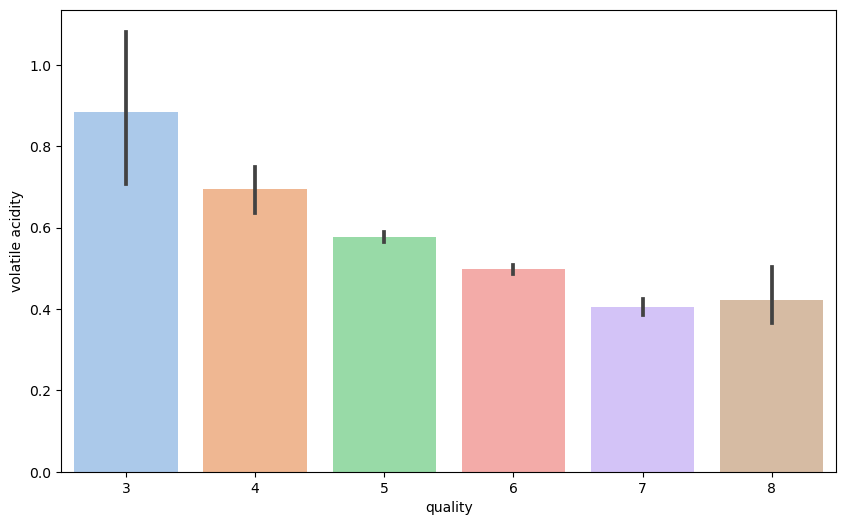

In [10]:
# Plotting the distribution of 'volatile acidity' vs 'quality'
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = data, palette = 'pastel')

The negative relationship between 'quality' and 'volatile acidity' (-0.39) can be seen in the bar plot above. It is clear that wines with the lowest quality scores have the highest amounts of volatile acidity. Moreover, higher quality wines tend to have increasingly lower amounts of volatile acidity. 

<a id="summary_analysis"></a>
## Summary of Analysis

- Large number of 'average' wines (quality score of 5 and 6)
- Small number of 'poor' and 'excellent' wines
- Relatively strong correlation between 'alcohol' and 'quality' (0.48)
- Relatively strong negative relationship between 'volatile acidity' and 'quality' (-0.39)
- Strong correlation between 'fixed acidity' and 'density' (0.67)
- Strong correlation between 'fixed acidity' and 'citric acid' (0.67)
- Strong correlation between 'total sulfur dioxide' and 'free sulfur dioxide' (0.67)

<a id="ml"></a>
# **Applying Machine Learning**

This section compares the performance of several machine learning models on predicting the quality of a wine given its features. The models used here include:
- Logistic Regression
- Random Forest Classifier
- K-Nearest Neighbors Classifier
- Support Vector Classifier

<a id="processing"></a>
## Set Up

As shown in the analysis phase, there is an inbalance of wine 'quality', with most wines having a score of 5 or 6 and few wines having an extremely low or high score. In order to create our binary classification task, I divide the target variable 'quality' into two groups: 'good' and 'bad'. Any wines under a quality score of 5.5 will be 'bad' and any wines over 5.5 will be 'good'.

In [11]:
# Dividing 'quality' into 'good' and 'bad' groups
bins = (1, 5.5, 10)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [12]:
# Assigning labels to 'quality', 'bad' = 0, 'good' = 1
quality_label = LabelEncoder()
data['quality'] = quality_label.fit_transform(data['quality'])

In [13]:
# Viewing new counts of 'bad' and 'good' wines
data['quality'].value_counts().sort_values()

0    744
1    855
Name: quality, dtype: int64

By encoding the 'quantity' target variable, we have created a binary classification task. Now, roughly 53% of the wines are labeled as 'good'. We can now employ machine learning techniques to determine whether or not a wine's quality score will fall above or below the 5.5 threshold based upon its 11 features. 

In [14]:
# Separating the target and feature variables
X = data.drop('quality', axis = 1)
y = data['quality']

In [15]:
# Train Test Split, Test Size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<a id="logistic_regression"></a>
## Logistic Regression

In [17]:
# Fitting data into logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred_log = logreg.predict(X_test)

In [18]:
# Checking the scores of the logistic regression model
accuracy = accuracy_score(y_test, pred_log)
precision = precision_score(y_test, pred_log)
recall = recall_score(y_test, pred_log)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.7375
Precision:  0.7950310559006211
Recall:  0.7150837988826816


In [19]:
# Checking the overall report of the logistic regression model
print(classification_report(y_test, pred_log))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       141
           1       0.80      0.72      0.75       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



**Logistic Regression Results**

As shown above, the logistic regression model yields an accuracy of 73.8% and a precision of 79.5%. The model appears to have higher precision for predicting 'good' quality wines (80%) than for predicting 'bad' quality wines (68%).

<a id="random_forest"></a>
## Random Forest

In [20]:
# Fitting data into random forest classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
pred_randomforest = randomforest.predict(X_test)

In [21]:
# Checking the scores of the random forest classifier
accuracy = accuracy_score(y_test, pred_randomforest)
precision = precision_score(y_test, pred_randomforest)
recall = recall_score(y_test, pred_randomforest)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.771875
Precision:  0.8154761904761905
Recall:  0.7653631284916201


In [22]:
# Checking the overall report of the random forest classifier
print(classification_report(y_test, pred_randomforest))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       141
           1       0.82      0.77      0.79       179

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.78      0.77      0.77       320



**Random Forest Results**

The random forest classifier has an accuracy of 76.9% and a precision of 81.4%. This classifier also has higher precision for 'good' quality wines (81%) compared to 'bad' quality wines (72%). The random forest classifier exhibits an overall increase in performance when compared to the logistic regression model. This random forest classifier will be improved later on by using grid search. 

<a id="knn"></a>
## K-Nearest Neighbors (KNN)

In [23]:
# Fitting data into KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [24]:
# Checking the scores of the KNN classifier
accuracy = accuracy_score(y_test, pred_knn)
precision = precision_score(y_test, pred_knn)
recall = recall_score(y_test, pred_knn)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.73125
Precision:  0.7409326424870466
Recall:  0.7988826815642458


In [25]:
# Checking the overall report of the KNN classifier
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68       141
           1       0.74      0.80      0.77       179

    accuracy                           0.73       320
   macro avg       0.73      0.72      0.72       320
weighted avg       0.73      0.73      0.73       320



**KNN Results**

The KNN classifier yields an accuracy of 73.1% and a precision of 74.1%. This classifier's precision for 'good' and 'bad' wines is relatively similar (74% and 72%, respectively). So far, the KNN classifier has the worst accuracy and precision scores. This classifier will be improved later on by using cross validation.

<a id="svc"></a>
## Support Vector Classifier (SVC)

In [26]:
# Fitting data into SVC classifier
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [27]:
# Checking the scores of the SVC classifier
accuracy = accuracy_score(y_test, pred_svc)
precision = precision_score(y_test, pred_svc)
recall = recall_score(y_test, pred_svc)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.765625
Precision:  0.8095238095238095
Recall:  0.7597765363128491


In [28]:
# Checking the overall report of the SVC classifier
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       141
           1       0.81      0.76      0.78       179

    accuracy                           0.77       320
   macro avg       0.76      0.77      0.76       320
weighted avg       0.77      0.77      0.77       320



**SVC Results**

The SVC classifier yields an accuracy of 76.6% and a precision of 81%. It exhibits a 72% precision for 'bad' wines and a 81% precision for 'good' wines. Overall, it is second best in performance, falling short behind the random forest classifier. This SVC classifier will also be improved by using grid search. 

<a id="model_improvements"></a>
# **Model Improvements**

This section improves the accuracy of the following models:
- Random Forest Classifier
- K-Nearest Neighbors Classifier
- Support Vector Classifier

<a id="random_cross"></a>
## Random Forest with GridSearchCV

In [29]:
# Creating param_grid
param_grid = {'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9]}

In [30]:
# Use GridSearchCV to obtain best parameters
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9)


In [31]:
# Updating parameters of random forest model
randomforest2 = RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9, n_estimators=50)
randomforest2.fit(X_train, y_train)
pred_randomforest2 = randomforest2.predict(X_test)

In [32]:
# Checking the scores of the tuned random forest model
accuracy = accuracy_score(y_test, pred_randomforest2)
precision = precision_score(y_test, pred_randomforest2)
recall = recall_score(y_test, pred_randomforest2)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.73125
Precision:  0.7751479289940828
Recall:  0.7318435754189944


**Results**

By using GridSearchCV the accuracy of the random forest model has decreased from 76.9% --> 72.5%. The precision has also decreased from 81.4% to 78.6%. Sometimes the default parameters for the random forest model are the best, even though the grid search provided us with particular parameter tuning. In this case, it may be best to rely on the default parameters.

<a id="knn_cross"></a>
## KNN with Cross Validation

In [33]:
# Using cross validation on the KNN model
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

In [34]:
# Training KNN model using the best k value
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
knn_cross_pred = knn.predict(X_test)

In [35]:
# Checking the scores of the improved KNN classifier
accuracy = accuracy_score(y_test, knn_cross_pred)
precision = precision_score(y_test, knn_cross_pred)
recall = recall_score(y_test, knn_cross_pred)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.76875
Precision:  0.7807486631016043
Recall:  0.8156424581005587


**Results**

By using cross validation to determine the ideal k value, the KNN model has improved its accuracy from 73.1% --> 76.9% and has improved its precision from 74.1% --> 78.1%.

<a id="grid_search"></a>
## SVC with GridSearchCV

In [36]:
# Fitting the model to grid
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
svc_grid = GridSearchCV(SVC(), param_grid, refit = True)
svc_grid.fit(X_train, y_train)
grid_pred = svc_grid.predict(X_test)

In [37]:
# Checking the scores of the improved SVC
accuracy = accuracy_score(y_test, grid_pred)
precision = precision_score(y_test, grid_pred)
recall = recall_score(y_test, grid_pred)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.771875
Precision:  0.8154761904761905
Recall:  0.7653631284916201


**Results**

By using GridSearchCV, the accuracy of the SVC model has improved from 76.6% --> 77.2% and the precision has improved from 81% --> 81.5%. 

<a id="conclusion"></a>
# **Conclusion**

From the work above, we can rank the best machine learning models for this binary classification task. 

Accuracy:
- SVC with GridSearchCV --> 77.2%
- KNN with Cross Validation --> 76.9%
- Random Forest --> 76.9%
- SVC --> 76.6%
- Logistic Regression --> 73.75%
- KNN --> 73.1%
- Random Forest with GridSearchCV --> 72.5%

Precision:
- SVC with GridSearchCV --> 81.5%
- Random Forest --> 81.4%
- SVC --> 81%
- Logistic Regression --> 79.5%
- Random Forest with GridSearchCV --> 78.6%
- KNN with Cross Validation --> 78.1%
- KNN --> 74.1%

These rankings suggest that SVC with GridSearchCV performs the best for this particular task. However, there is not much significant difference between the accuracies and precisions of these models. As this dataset was found on Kaggle, I was able to look at other, yet different, attempts of this binary classification task. Some of these works divided the 'quality' variable at different thresholds. For future work, it would be interesting to see how these models would perform if the threshold determining 'good' vs 'bad' wine was increased or decreased. 


<a id="thanks"></a>
# **Thank You!**

Thanks for taking the time to look over this project! This project was completed as part of the CU Boulder Introduction to Machine Learning: Supervised Learning course final. I welcome any constructive feedback! In you are viewing this on Kaggle, please leave an upvote! :) 